## Formatacao do Dataset

In [142]:
# importando libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
import numpy as np

In [143]:
#Carreando os dados para a análise
df = pd.read_csv('../dados/data-test-analytics.csv',encoding='utf-8')

#Alterando as opções para uma melhor visualizacao dos dados
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df1 = df

In [144]:
# Definição das colunas para consultas durante a análise
explain = {
    "id" : "Identificação do cliente",
    "created_at" : "Data de criação da assinatura",
    "updated_at" : "Data da última modificação da assinatura",
    "deleted_at" : "Data de cancelamento da assinatura",
    "name_hash" : "Nome do usuário (criptografado)",
    "email_hash" : "Email (criptografado)",
    "address_hash" : "Endereço (criptografado)",
    "birth_date" : "Data de aniversário do cliente",
    "status" : "Status da assinatura",
    "version" : "Versão da assinatura",
    "city" : "Cidade do cliente",
    "state" : "Estado do cliente",
    "neighborhood" : "Bairro do cliente",
    "last_date_purchase" : "Data do último pedido que ocorreu pela assinatura",
    "average_ticket" : "Média de gasto por pedido",
    "items_quantity" : "Média de itens na assinatura",
    "all_revenue" : "Total de receita realizado pelo cliente",
    "all_orders" : "Total de pedidos realizado pelo cliente",
    "recency" : "Tempo desde a última compra do cliente",
    "marketing_source" : "Canal de marketing que converteu a assinatura"    
}


In [145]:
#Visualizando o dataset
display(df.head(1))

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm


Antes de checar os tipos de dados cria-se 2 colunas que poderão melhorar a análise
- coluna de churn
- coluna de região

In [146]:
# Criação da coluna churn
churn = []
for i in df1['status'].tolist():
    if(i == 'canceled'):
        churn.append(1)
    else:
        churn.append(0)
df1['churn'] = churn

df1['churn'].unique()

array([0, 1])

In [147]:
df1['state'].unique()

df['regiao'] = df['state'].map({
    'AM': 'Norte', 'RR': 'Norte', 'PE': 'Nordeste', 'RJ': 'Sudeste', 'MT': 'Centro-Oeste', 
    'SC': 'Sul', 'PR': 'Sul', 'PB': 'Nordeste', 'AP': 'Norte', 'SP': 'Sudeste', 
    'MG': 'Sudeste', 'MA': 'Nordeste', 'AL': 'Nordeste', 'PI': 'Nordeste', 'RO': 'Norte', 
    'AC': 'Norte', 'CE': 'Nordeste', 'RN': 'Nordeste', 'MS': 'Centro-Oeste', 'PA': 'Norte', 
    'ES': 'Sudeste', 'SE': 'Nordeste', 'RS': 'Sul', 'DF': 'Centro-Oeste', 'BA': 'Nordeste', 
    'GO': 'Centro-Oeste', 'TO': 'Norte'
})

df1['regiao'].unique()

array(['Norte', 'Nordeste', 'Sudeste', 'Centro-Oeste', 'Sul'],
      dtype=object)

Checando os tipos de dados

In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   created_at          10000 non-null  object 
 2   updated_at          10000 non-null  object 
 3   deleted_at          505 non-null    object 
 4   name_hash           10000 non-null  object 
 5   email_hash          10000 non-null  object 
 6   address_hash        10000 non-null  object 
 7   birth_date          10000 non-null  object 
 8   status              10000 non-null  object 
 9   version             10000 non-null  object 
 10  city                10000 non-null  object 
 11  state               10000 non-null  object 
 12  neighborhood        10000 non-null  object 
 13  last_date_purchase  10000 non-null  object 
 14  average_ticket      10000 non-null  float64
 15  items_quantity      10000 non-null  int64  
 16  all_r

Observa-se que há campos de data com tipo de dados 'object', o que pode dificultar a análise, e também há dados que poderiam ser categóricos para melhorar a análise.

In [149]:
data_types = {
    'created_at': 'datetime64[ns]',
    'updated_at':'datetime64[ns]',
    'deleted_at':'datetime64[ns]',
    'status':'category',
    'last_date_purchase':'datetime64[ns]',
    'marketing_source':'category',
    'regiao':'category'
}

df1 = df1.astype(data_types)

#Checando os tipos de dados
df1.info()

/tmp/ipykernel_6417/2902776849.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = df1.astype(data_types)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  10000 non-null  object        
 1   created_at          10000 non-null  datetime64[ns]
 2   updated_at          10000 non-null  datetime64[ns]
 3   deleted_at          505 non-null    datetime64[ns]
 4   name_hash           10000 non-null  object        
 5   email_hash          10000 non-null  object        
 6   address_hash        10000 non-null  object        
 7   birth_date          10000 non-null  object        
 8   status              10000 non-null  category      
 9   version             10000 non-null  object        
 10  city                10000 non-null  object        
 11  state               10000 non-null  object        
 12  neighborhood        10000 non-null  object        
 13  last_date_purchase  10000 non-null  datetime64[

/tmp/ipykernel_6417/2902776849.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = df1.astype(data_types)
/tmp/ipykernel_6417/2902776849.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = df1.astype(data_types)
/tmp/ipykernel_6417/2902776849.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = df1.astype(data_types)


### Analisa-se de forma ampla o dataframe para obter insights relevantes para a análise

In [150]:
print('Dados Temporais e Numéricos:')
display(df1.describe().round(2))
print('Dados de Objetos e Categóricos:')
display(df1.describe(include=['object','category']))

Dados Temporais e Numéricos:


,created_at,updated_at,deleted_at,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,churn
count,10000,10000,505,10000,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,2018-08-12 05:40:22.464000,2020-12-25 06:06:27.533999616,2019-12-02 14:16:21.861385984,2020-12-13 06:09:13.463999488,216.89,8.50,1174.89,5.42,67.19,0.05
min,2016-02-19 10:00:00,2016-05-02 13:46:00,2016-05-02 13:46:00,2016-02-25 03:48:00,131.38,1.00,0.00,0.00,1.00,0.00
25%,2017-05-15 11:42:00,2021-01-10 11:23:00,2019-04-04 11:10:00,2021-01-10 11:23:00,201.40,6.00,494.87,2.00,31.00,0.00
50%,2018-08-09 21:42:00,2021-01-14 11:23:00,2020-04-16 15:38:00,2021-01-14 11:23:00,217.02,8.00,1172.75,5.00,35.00,0.00
75%,2019-11-04 17:18:30,2021-01-18 11:23:00,2020-11-02 21:59:00,2021-01-18 11:23:00,232.46,11.00,1798.48,8.00,39.00,0.00
max,2021-02-18 05:04:00,2021-02-17 22:19:00,2021-02-17 22:19:00,2021-02-16 19:46:00,303.39,19.00,3225.65,11.00,1820.00,1.00
std,NaN,NaN,NaN,NaN,22.76,3.03,763.14,3.46,175.72,0.22


Dados de Objetos e Categóricos:


,id,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,marketing_source,regiao
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,10000,7876,3,2905,2406,27,482,6,5
top,8bf7960e-3b93-468b-856e-6c6c5b56f52b,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,06/18/42 12:00 AM,active,4.26.7,Cardoso,TO,Vila Antena,organic_search,Nordeste
freq,1,1,1,1,5,8524,24,161,409,36,3699,3250


Baseado nos dados acima:
- Podemos notar 8524 clientes estão ativos, logo a quantidade de churn está abaixo deste valor;
- A média de recency (Tempo desde a última compra do cliente) pode obter erro por conta de possiveis outliers;
- Algumas colunas não necessitam ser analisadas, já que os dados são distintos (name_hash, email_hash, address_hash);
- A maior parte dos clientes estão ativos;
- A maior parte de clientes foi adquirida pelo marketing organic_search;
- A maior parte de clientes é do Nordeste.

É possivel notar que a coluna status indica a situação da conta do cliente, logo, deve-se analisar esta coluna para checar o churn, que seriam os clientes cancelados. Ao olharmos para a coluna all_orders, verificamos também que há clientes que nunca compraram.

In [151]:
query = '''
    SELECT
        status,
        COUNT(status) as qtd_clientes
    FROM df1
    WHERE all_orders == 0 OR status == 'paused' OR status == 'canceled'
    GROUP BY 1
'''

ps.sqldf(query)

,status,qtd_clientes
0,active,765
1,canceled,505
2,paused,971


Com base nesses dados podemos obter 2 análises distintas, uma para o churn real, que seriam os clientes com status cancelados, e outra para o churn estimado, o qual seria a soma dos clientes cancelados, com os pausados e clientes ativos que ainda não compraram nada, pois estes podem se tornar possíveis churn.

## Análise Exploratória

Utiliza-se a matriz de correlação para entender quais variáveis podem ser analisadas a fim de se obter uma melhor visão do churn. Necessita-se transformar os dados categóricos em valores numéricos para que ocorra a correlação.

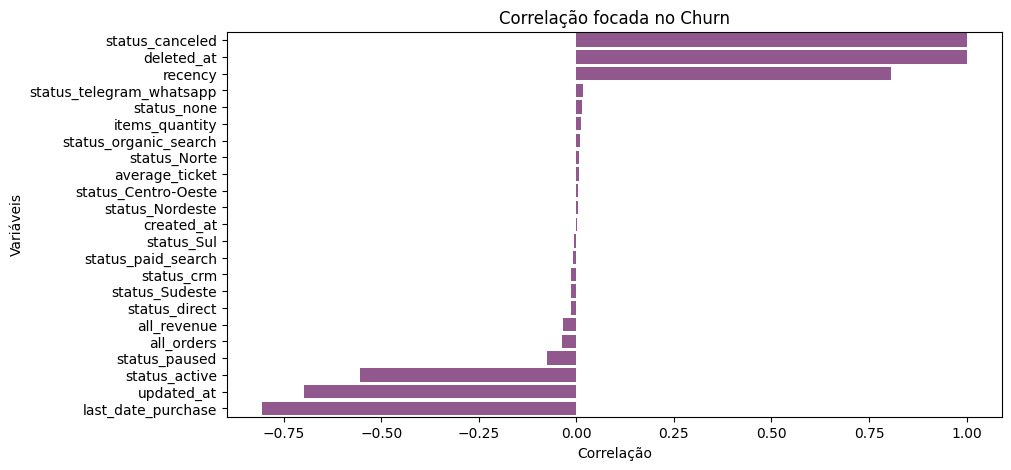

In [152]:
df2 = df1[['created_at','updated_at','deleted_at','status',
           'last_date_purchase','average_ticket','items_quantity',
           'all_revenue','all_orders','recency','marketing_source','churn','regiao'
        ]]

# Usando o one-hot encoding   
categorical_encoded = pd.get_dummies(df2[['status','marketing_source','regiao']], prefix='status')
df2 = pd.concat([df2, categorical_encoded], axis=1)
df2 = df2.drop(['status','marketing_source','regiao'], axis=1)

corr_matrix = df2.corr()

# Filtrando a matrix de correlação para mostrar apenas a variavel 'churn'
churn_corr = corr_matrix['churn'].drop('churn').sort_values(ascending=False)

# Configurando o tamanho da imagem
fig, ax = plt.subplots(figsize=(10, 5))

# Grafico de barras
sns.barplot(x=churn_corr.values, y=churn_corr.index, color='#9B4E96', ax=ax)

# Configurando titulos e mostrando o grafico
plt.title('Correlação focada no Churn')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.savefig('../graficos/correlacao_churn.png')
plt.show()

A partir deste gráfico baseado na matriz de correlação, podemos observar que as variáveis recency, status e deleted_at possuem um alto grau de correlação com o churn. Sendo assim, iremos analisar essas 3 variáveis prioritariamente.

As variáveis status e deleted_at são altamente relacionadas ao churn.

### Analisando o churn real


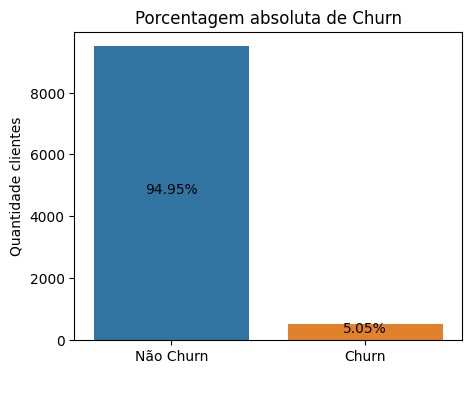

In [165]:
# Visualizando o churn real

total=len(df1)
fig, ax = plt.subplots(figsize = (5,4))

# Grafico de Barras
g=sns.countplot(data = df1, x='churn')

# Adicionando os valores no grafico
for i in g.patches:
    height = i.get_height()
    g.text(i.get_x()+i.get_width()/2., height/2, f'{100*height/total:1.2f}%', ha="center", color='black')
    
ax.set_xticklabels(['Não Churn', 'Churn'])
plt.xlabel(' ')
plt.ylabel('Quantidade clientes')
plt.title('Porcentagem absoluta de Churn')
plt.savefig('../graficos/churn_atual.png')
plt.show()

#### Analisando a variável recency x churn_real (clientes cancelados)

In [231]:
# Executando a consulta SQL
query = '''
    SELECT 
        FLOOR((recency - 1) / 90) * 90 + 1 AS recency_group,
        COUNT(deleted_at) AS churn 
    FROM df1
    WHERE deleted_at IS NOT NULL
    GROUP BY 1 
'''

# Lendo os resultados da consulta em um DataFrame do pandas
churn_data = ps.sqldf(query)

# Exibindo a tabela
print(churn_data)

    recency_group  churn
0               1     46
1              91     36
2             181     40
3             271     39
4             361     30
5             451     38
6             541     31
7             631     25
8             721     29
9             811     29
10            901     23
11            991     24
12           1081     19
13           1171     26
14           1261     24
15           1351     11
16           1441      9
17           1531     14
18           1621      8
19           1711      3
20           1801      1


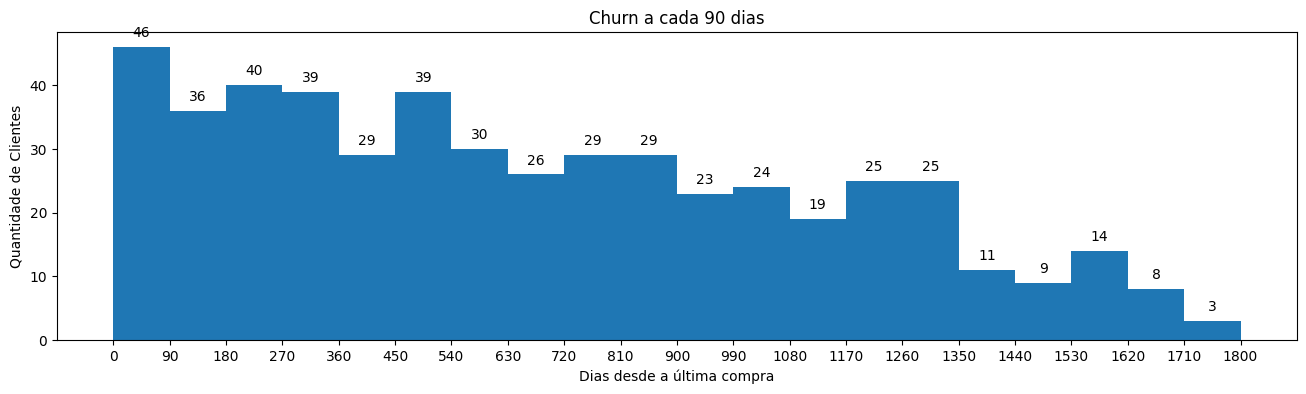

In [233]:
# Query para identificar a quantidade de churn se baseando nos dias
query= '''
SELECT 
    recency,
    COUNT(deleted_at) AS churn 
    FROM df1
    WHERE deleted_at IS NOT NULL
    GROUP BY 1 
'''

churn_data = ps.sqldf(query)

# Criando uma lista de bins para setar corretamente o periodo que eu quero analisar
max_recency = 30 * ((max(churn_data['recency']) + 29) // 30)
bins = range(0, max_recency+31, 90)

# Histograma
plt.figure(figsize=(16,4))
plt.hist(churn_data['recency'], bins=bins, weights=churn_data['churn'])

# Adicionando valores no topo do grafico
for rect in plt.gca().patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    plt.annotate(f'{y:.0f}', (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

ax.grid(False)
plt.xlabel('Dias desde a última compra')
plt.ylabel('Quantidade de Clientes')
plt.title('Churn a cada 90 dias')

# Renomeando o eixo x
plt.xticks(range(0, max_recency+1, 90), [str(x) for x in range(0, max_recency+1, 90)])
plt.savefig('../graficos/evolucao_trimestral_churn.png')
plt.show()

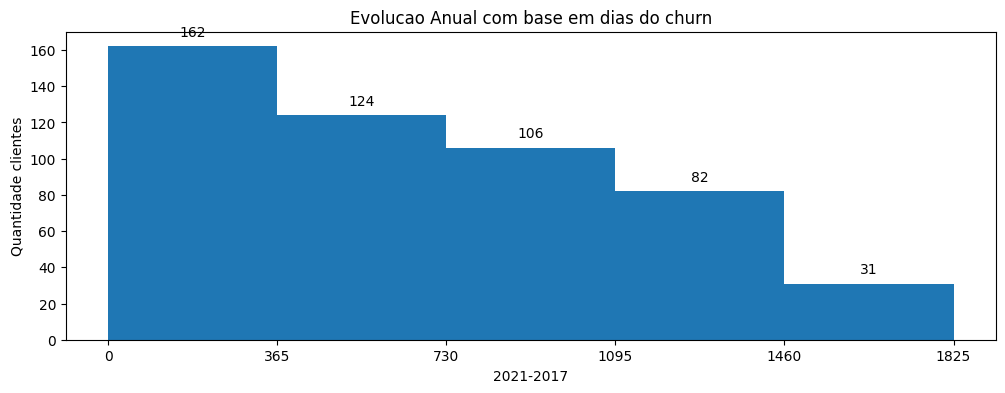

In [202]:
max_recency = 30 * ((max(churn_data['recency']) + 29) // 30)

# Criando uma lista de bins para setar corretamente o periodo que eu quero analisar (de ano em ano)
bins = range(0, max_recency+31, 365)

# Histograma
plt.figure(figsize=(12,4))
plt.hist(churn_data['recency'], bins=bins, weights=churn_data['churn'])
# Adicionando valores no topo do grafico
for rect in plt.gca().patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    plt.annotate(f'{y:.0f}',
                 (x, y),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center',
                 va='bottom')

ax.grid(False)
plt.xlabel('2021-2017')
plt.ylabel('Quantidade clientes')
plt.title('Evolucao Anual com base em dias do churn')
plt.xticks(range(0, max_recency+1, 365), [str(x) for x in range(0, max_recency+1, 365)])
plt.savefig('../graficos/evolucao_anual_churn.png')
plt.show()

Com base nos graficos, notas-se que a maior quantidade de churn provem dos clientes mais recentes em comparacao com todo o historico do churn

#### Analisando a variavel recency x servicos ativos/pausados

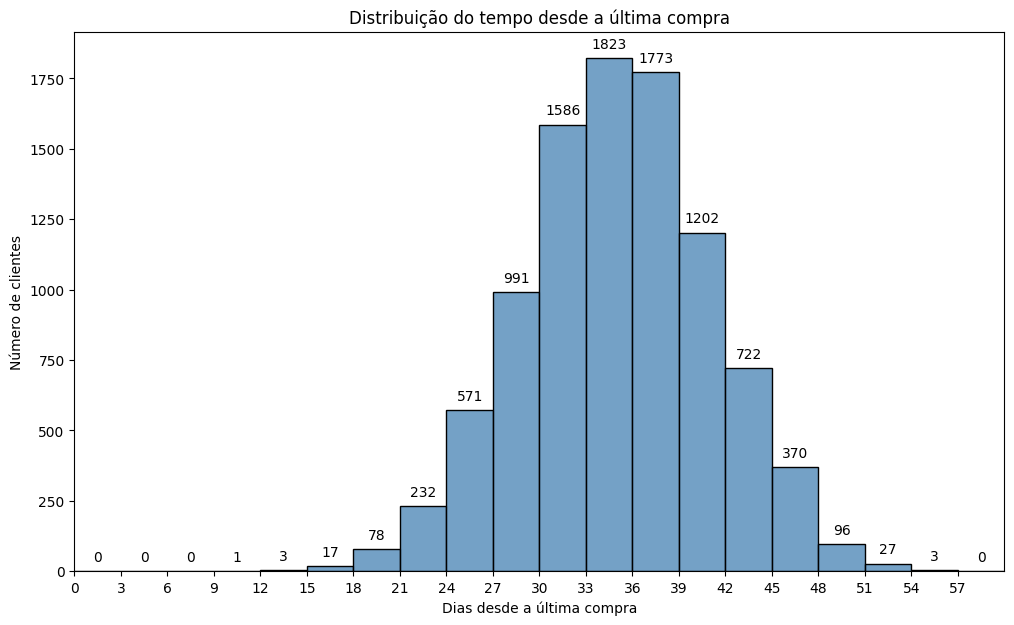

In [203]:
#Retirando os cancelados para uma analise sem influencia do churn
df2 = df1[df1['status'] != 'canceled'][['recency', 'status']]

# Histograma
plt.figure(figsize=(12, 7))
ax = sns.histplot(data=df2.recency, bins=range(0, 90, 3), color='steelblue')

# Adicionando valores no topo do grafico
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
ax.grid(False)
plt.xlabel('Dias desde a última compra')
plt.ylabel('Número de clientes')
plt.title('Distribuição do tempo desde a última compra')
plt.xlim([0, 60])
plt.xticks(ticks=range(0, 60, 3))
plt.savefig('../graficos/frequencia_compras.png')
plt.show()

Analisando o grafico acima, podemos entender entao que os servicos ativos sao renovados geralmente no periodo de 27 a 42 dias.

#### Olhando para o churn_real de forma micro, por regioes e por marketing_source

/tmp/ipykernel_6417/1680882682.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x='marketing_source', y='churn' , data=df1, ax=ax2, palette='Set2',ci=None)


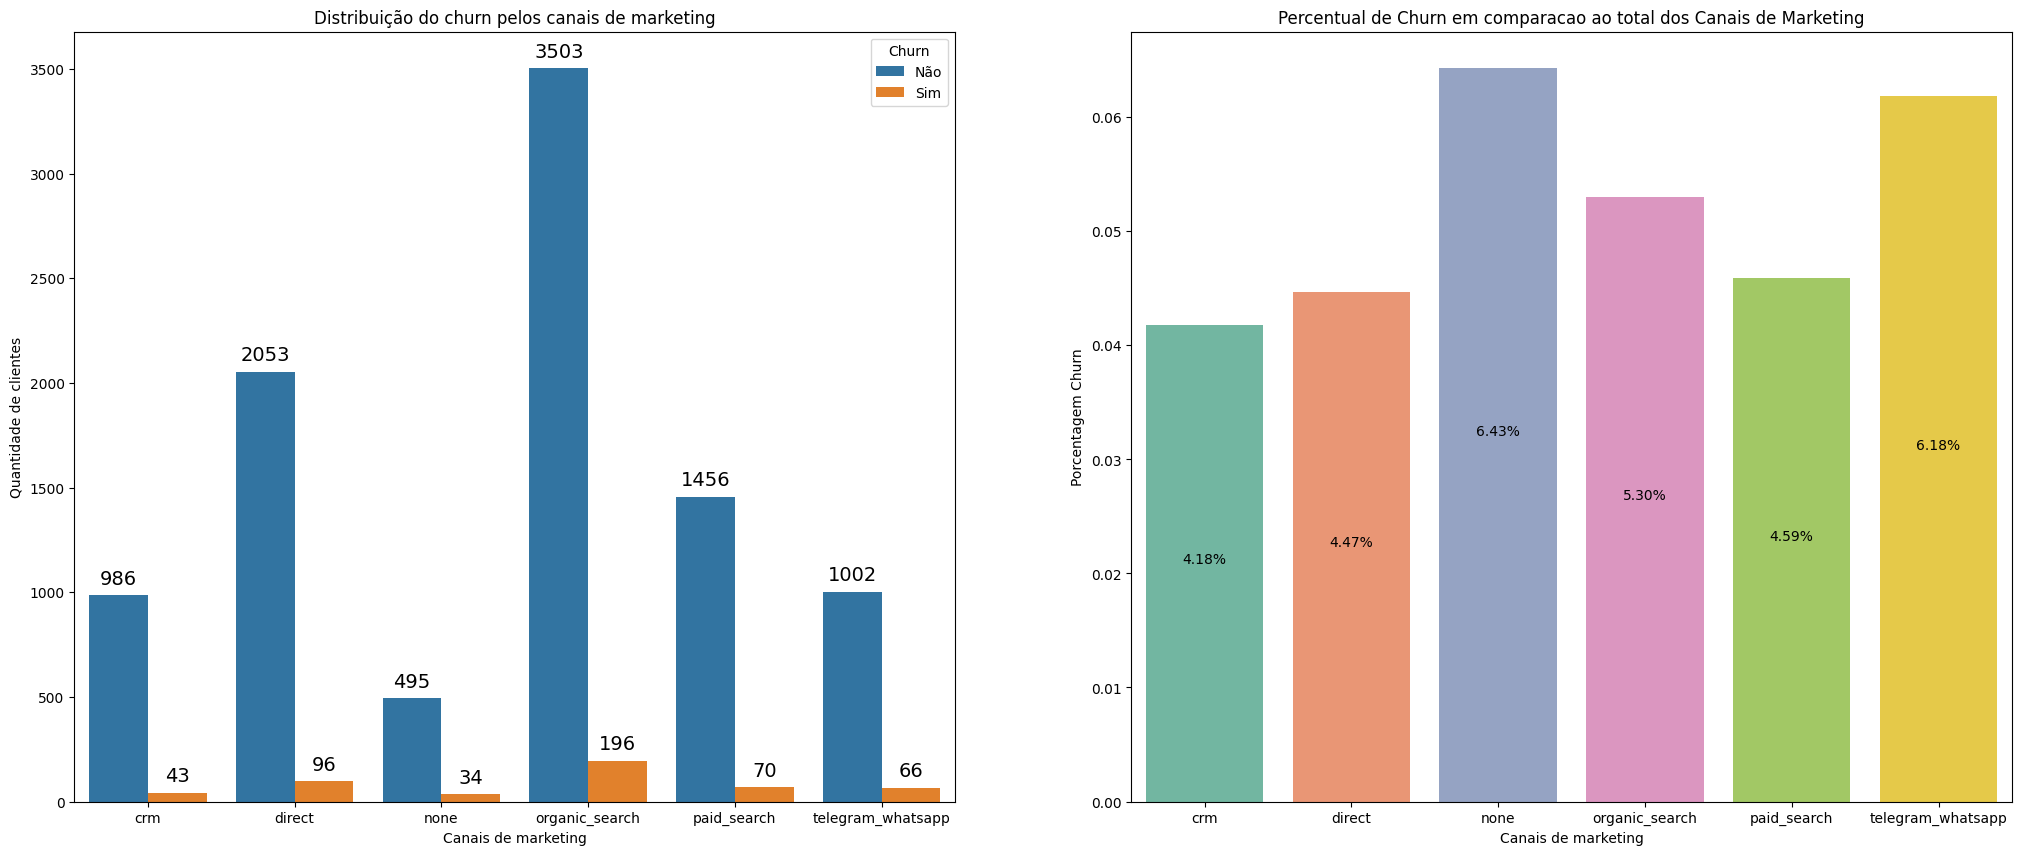

In [204]:
# Gerando 2 graficos combinados

plt.figure(figsize=(25,10))

# Grafico 1 - Grafico de Barras
ax1 = plt.subplot(1,2,1)
sns.countplot(x='marketing_source', hue='churn', data=df1, ax=ax1)

# Adicionando valores no topo do grafico
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 12), 
                textcoords = 'offset points',
                fontsize=14)

handles, labels = ax1.get_legend_handles_labels()
new_labels = ['Não', 'Sim']

ax1.legend(handles, new_labels, title='Churn', fontsize=10)
ax1.set_title('Distribuição do churn pelos canais de marketing')
ax1.set_xlabel('Canais de marketing')
ax1.set_ylabel('Quantidade de clientes')
#plt.show()

# Grafico 2 - Grafico de Barras
ax2 = plt.subplot(1,2,2)
g = sns.barplot(x='marketing_source', y='churn' , data=df1, ax=ax2, palette='Set2',ci=None)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.2f}%'.format(100*height),
            ha="center", color='black')

ax2.set_xlabel('Canais de marketing')
ax2.set_title('Percentual de Churn em comparacao ao total dos Canais de Marketing')
ax2.set_ylabel('Porcentagem Churn')
plt.savefig('../graficos/churn_canais_marketing.png')
plt.show()

Podemos notar que mesmo que o canal none possua uma porcentagem de churn maior do que os outros, o canal telegram_whatsapp que de fato recebe algum investimento, possui o churn mais problematico. 

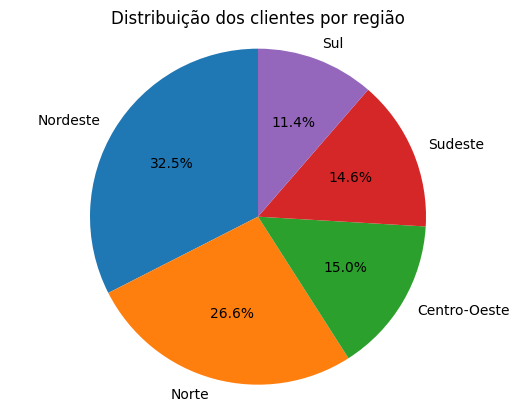

In [205]:
# Variaveis para o grafico de pizza
regiao_counts = df1['regiao'].value_counts()
labels = regiao_counts.index.tolist()
sizes = regiao_counts.values.tolist()

# Grafico de pizza
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição dos clientes por região')
plt.axis('equal')
plt.savefig('../graficos/clientes_por_regiao.png')
plt.show()

Podemos entender em qual regiao podemos dar um foco maior para a resolucao do problema

/tmp/ipykernel_6417/3745311767.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x='regiao', y='churn' , data=df1, ax=ax2, palette='Set2',ci=None)


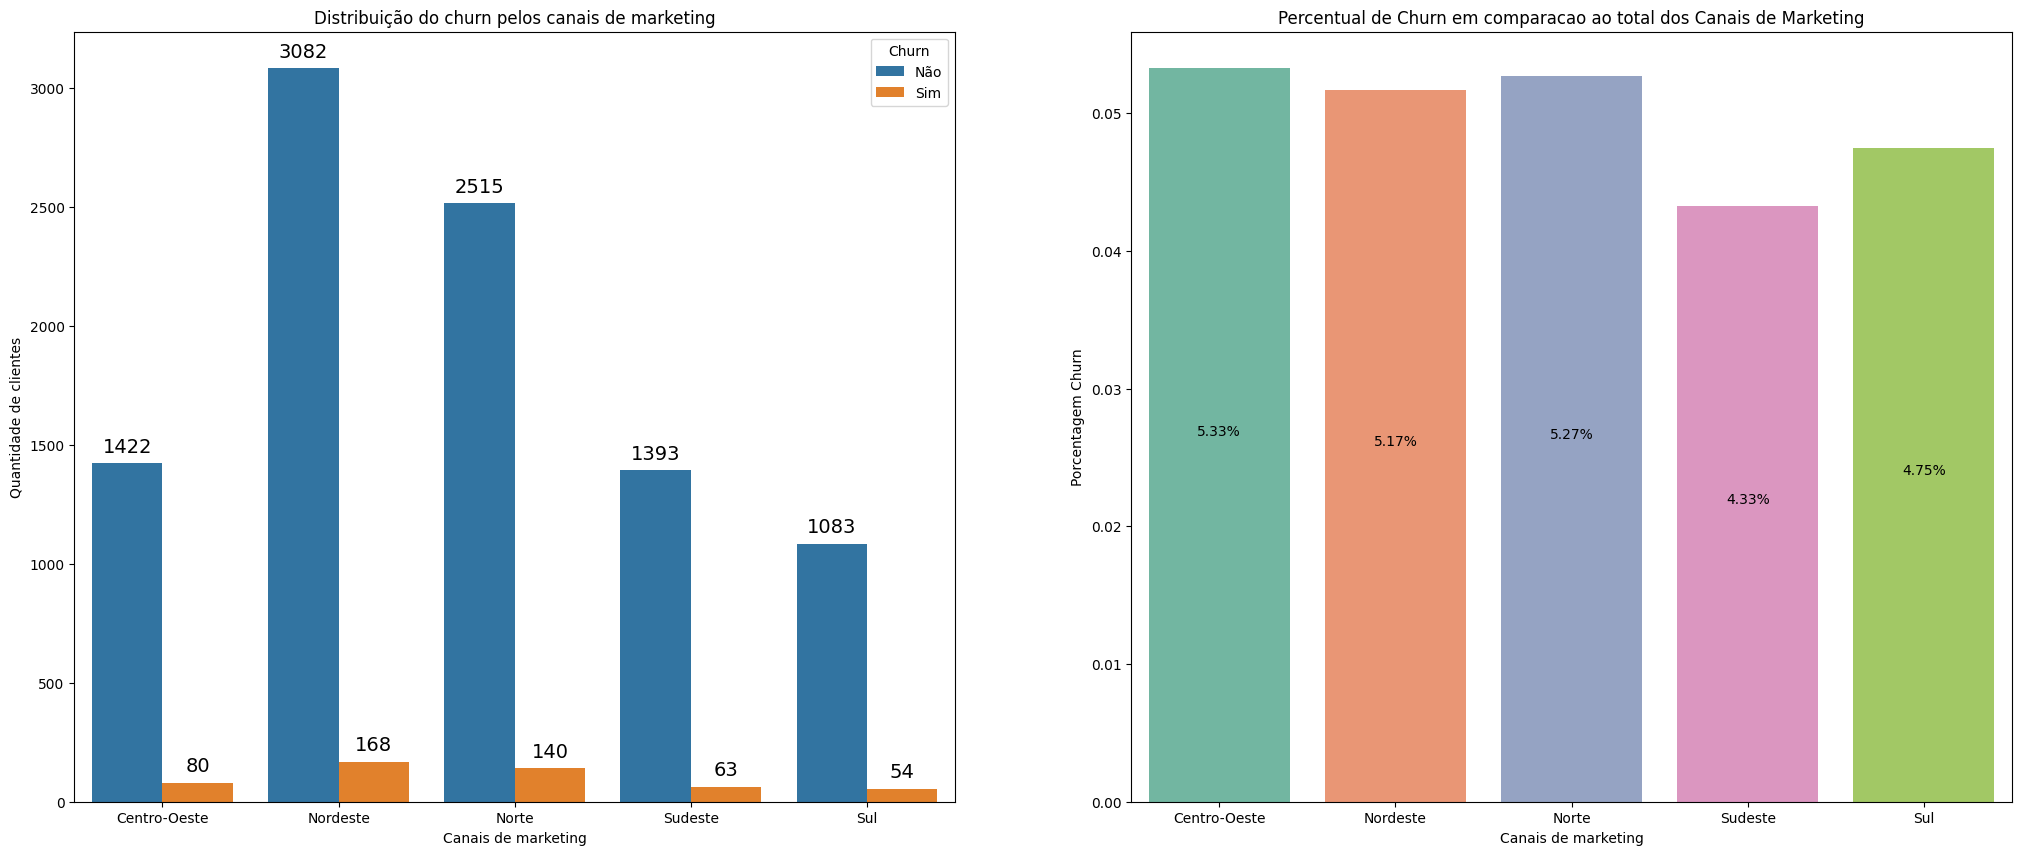

In [206]:
# Gerando 2 graficos combinados

plt.figure(figsize=(25,10))

# Grafico 1 - Grafico de Barras
ax1 = plt.subplot(1,2,1)
sns.countplot(x='regiao', hue='churn', data=df1, ax=ax1)

# Adicionando valores no topo do grafico
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 12), 
                textcoords = 'offset points',
                fontsize=14)

handles, labels = ax1.get_legend_handles_labels()
new_labels = ['Não', 'Sim']

ax1.legend(handles, new_labels, title='Churn', fontsize=10)
ax1.set_title('Distribuição do churn pelos canais de marketing')
ax1.set_xlabel('Canais de marketing')
ax1.set_ylabel('Quantidade de clientes')
#plt.show()

# Grafico 2 - Grafico de Barras
ax2 = plt.subplot(1,2,2)
g = sns.barplot(x='regiao', y='churn' , data=df1, ax=ax2, palette='Set2',ci=None)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.2f}%'.format(100*height),
            ha="center", color='black')

ax2.set_xlabel('Canais de marketing')
ax2.set_title('Percentual de Churn em comparacao ao total dos Canais de Marketing')
ax2.set_ylabel('Porcentagem Churn')
plt.savefig('../graficos/churn_canais_marketing.png')
plt.show()

Percebesse entao que o churn e diretamente proporcional a quantidade de clientes em uma regiao , quanto mais clientes em uma regiao maior sera o churn nela.

#### Olhando para as regioes x marketing_source

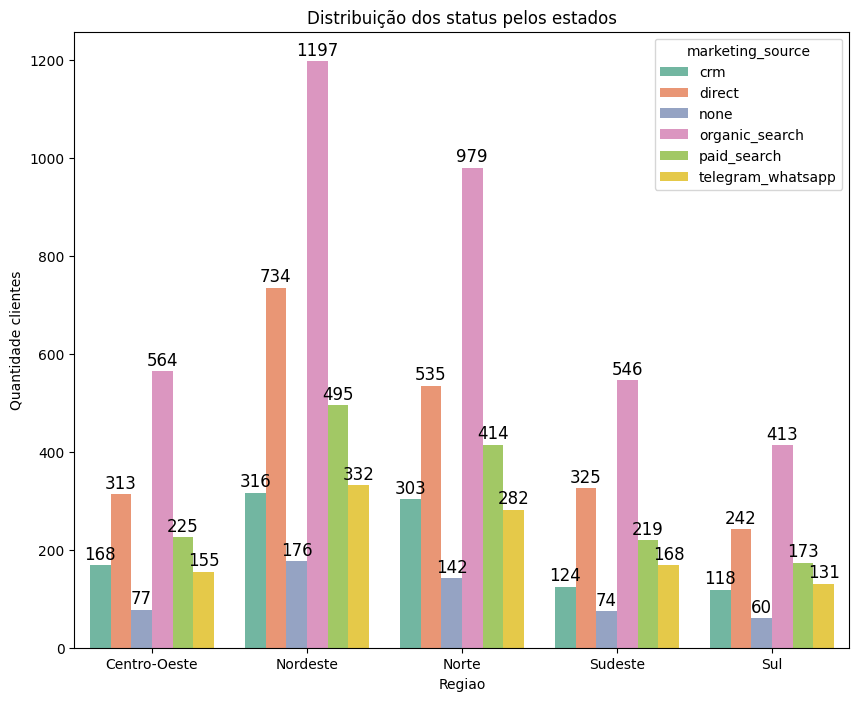

In [207]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='regiao', hue='marketing_source', data=df1, palette='Set2')

# Adicionando valores no topo do grafico
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points',
                fontsize=12)
ax.grid(False)
plt.title('Distribuição dos status pelos estados')
plt.xlabel('Regiao')
plt.ylabel('Quantidade clientes')
plt.show()

#### Insights churn real

Com base nesta analine do churn real, obtivemos alguns insights interessantes:
- Com base nos graficos, notasse que a maior quantidade de churn provem dos clientes mais recentes em comparacao com todo o historico do churn
- Os clientes ativos costumam manter um padrao de compras de 27 a 42 dias
- O churn e diretamente proporcional a quantidade de clientes
- O canal de marketing telegram_whatsapp possui o maior churn se comparado aos outros canais que tambem recebem investimentos, alem disso, ele vai contra a proporcionalidade padrao, pois mesmo sendo o quarto canal com maior numero de clientes, possui uma porcentagem de churn maior do que o canal que esta em primeiro lugar (organic_search)
- A colocacao das regioes que mais assinam o servico da petlove: 1 - Nordeste, 2 - Norte, 3 - Centro-Oeste, 4 - Sudeste, 5 - Sul 

### Analisando o churn estimado


In [208]:
df2 = df1.copy()
churn = []
for i, row in df2.iterrows():
    if(row['status'] == 'canceled'):
        churn.append(1)
    elif(row['status'] == 'paused'):
        churn.append(2)
    elif(row['all_orders'] == 0 and row['status'] not in ['canceled', 'paused']):
        churn.append(3)
    else:
        churn.append(0)
df2['churn_estimado'] = churn

df2['churn_estimado'].unique()

array([0, 2, 1, 3])

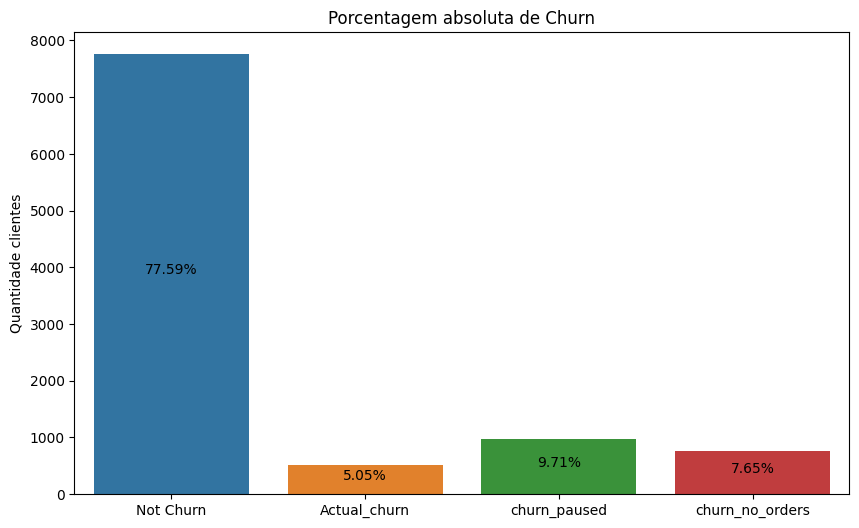

In [209]:
total=len(df2)
fig, ax = plt.subplots(figsize = (10,6))
g=sns.countplot(data = df2, x='churn_estimado')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            f'{100*height/total:1.2f}%',
            ha="center", color='black')
    
ax.set_xticklabels(['Not Churn', 'Actual_churn','churn_paused','churn_no_orders'])
plt.title('Porcentagem absoluta de Churn')
plt.xlabel('')
plt.ylabel('Quantidade clientes')
plt.savefig('../graficos/churn_estimado_divido.png')
plt.show()

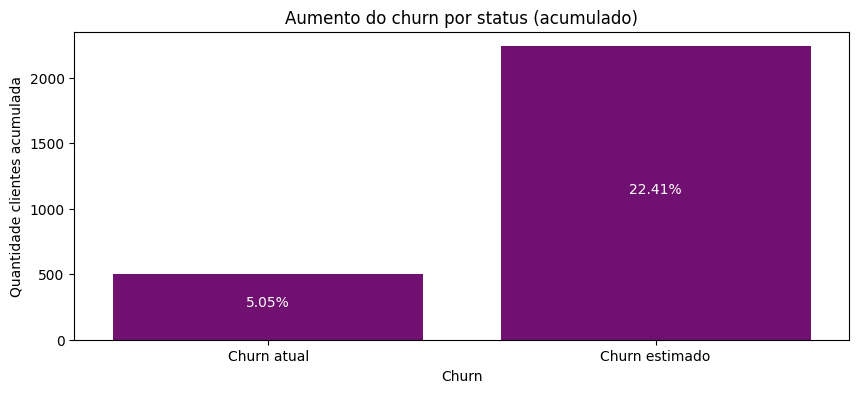

In [210]:
df2 = df1
#df2['status'].replace('canceled','zcanceled', inplace=True)

query='''SELECT status, SUM(churn) AS churn
FROM (
    SELECT 
        (CASE WHEN status == 'active' THEN 'paused' ELSE status END) AS status,
        COUNT(status) AS churn
    FROM df1
    WHERE all_orders == 0 OR status == 'canceled' OR status =='paused'
    GROUP BY 1
)
GROUP BY 1
'''
df_query = ps.sqldf(query)
df_query['churn_estimado'] = df_query['churn'].cumsum()
df_query = df_query[['status','churn_estimado']]

# Creating bar plot
fig, ax = plt.subplots(figsize=(10, 4))
g = sns.barplot(data=df_query, x=['Churn atual', 'Churn estimado'], y='churn_estimado',color='purple', ax=ax)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            f'{100*height/total:1.2f}%',
            ha="center", color='white')

# Formatting plot
ax.set_xlabel('Churn')
ax.set_ylabel('Quantidade clientes acumulada')
ax.set_title('Aumento do churn por status (acumulado)')
plt.savefig('../graficos/churn_estimado.png')
# Displaying plot
plt.show()

A partir deste simples grafico podemos considerar que o churn possui um grande potencial de mais que quadruplicar (um aumento de 443.76%) em relacao ao atual, indo de 5.05% para 22.41%.

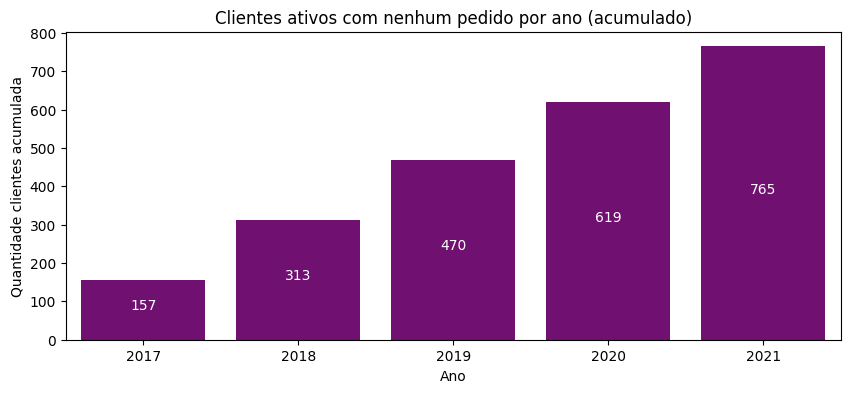

In [211]:
# Defining SQL query
query = '''
    SELECT strftime('%Y', created_at) AS year,
        COUNT(all_orders) as qtd_clientes
    FROM df1
    WHERE all_orders = 0 AND status == 'active'
    GROUP BY 1
'''

# Running query using pandasql
df_query = ps.sqldf(query)

df_query['soma'] = df_query['qtd_clientes'].cumsum()
df_query = df_query[['year','soma']]

# Creating bar plot
fig, ax = plt.subplots(figsize=(10, 4))
g = sns.barplot(data=df_query, x='year', y='soma', color='purple', ax=ax)

# Adding labels to the plot
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            f'{height:1.0f}',
            ha="center", color='white')

# Formatting plot
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade clientes acumulada')
ax.set_title('Clientes ativos com nenhum pedido por ano (acumulado)')
plt.savefig('../graficos/acumulado_ativos_sem_gasto.png')
# Displaying plot
plt.show()

Podemos observar que e crescente o numero desses clientes, sendo possivel supor que no proximo ano tera mais um aumento.

## Próximos Passos

Resumo:

Durante a analise observamos dados relacionados ao churn que podem implicar em sua variacao. Por conta disso, foi observado que o churn provem dos clientes mais recentes em comparacao com todo o historico do churn (5 anos), dentre os canais de marketing que possuem investimento o whatsapp e telegram sao os que possuem um maior nivel de churn e que esse churn e diretamente proporcional a quantidade de clientes, sendo o Nordeste a regiao com mais assinantes do servico Petlove. 

Caso nenhuma ação seja tomada, é possível que o churn aumente de 5,05% para 14,76% devido às contas pausadas, representando um aumento de 271%. Ademais, há 765 "ativos" que não realizam compras, o que eleva ainda mais o potencial de aumento do churn, podendo ir para 22.41%. Portanto, é essencial que sejam implementadas medidas para minimizar os efeitos do churn e garantir a fidelização dos clientes.


### Sugestão 1: Adotar o NPS
Uma possível sugestão para minimizar o churn seria adotar o Net Promoter Score (NPS). Essa metodologia é utilizada para avaliar o grau de satisfação e fidelidade dos clientes em relação a determinada empresa ou produto. Por meio do NPS, é possível coletar feedbacks dos clientes, identificar deficiências no produto ou serviço e até mesmo encontrar as razões para a insatisfação dos clientes.

No caso da Petlove, o NPS pode ser uma forma de entender melhor as necessidades e desejos dos clientes, o que pode ajudar a desenvolver estratégias mais eficazes para manter a fidelidade dos mesmos, evitando o churn dos clientes de longa data. Além disso, é possível utilizar o NPS para converter clientes que cancelaram seus serviços, incentivando-os a retornar e tornar-se novamente assinantes.

### Sugestão 2: Oferecer incentivos nos primeiros meses
Outra sugestão para minimizar o churn seria oferecer incentivos nos primeiros meses de assinatura, a fim de aumentar a fidelização dos clientes tendo em vista que grande parte do churn provem de clientes que cancelaram suas assinaturas em menos de 1 ano.

Uma estratégia interessante seria oferecer um cupom de desconto para a primeira compra, juntamente com uma oferta do serviço de assinatura, destacando as vantagens de se tornar um assinante. Além disso, a empresa pode desenvolver um programa de recompensas para os clientes mais fiéis, que realizam compras frequentemente e mantém-se ativos por um período prolongado. Isso pode incentivar os clientes a permanecerem na plataforma por mais tempo.

### Sugestão 3: Reativar clientes ativos sem compras
Ha clientes ativos que não realizam compras na Petlove desde 2017 e que so aumenta ao longo dos anos. Para minimizar um possivel churn, a empresa pode adotar estratégias para incentivá-los a realizar novas compras.

Uma possível solução seria entrar em contato com esses clientes por e-mail ou por mensagens via whatsapp e telegram, oferecendo cupons de desconto com prazo de validade limitado (com cerca de 1 mes de validade), para incentivar a realização de novas compras. Além disso, é importante que na mensagem esteja destacado as vantagens de se tornar um assinante.

Poderiam adotar o telegram como plataforma de marketing digital.

Esta solucao nao so aumentaria os clientes adquiridos pelo canal de marketing whatsapp_telegram, como tambem teria grandes chances de diminuir o churn dessa plataforma, alem de valorizar o investimento nesse canal de marketing.